   Unnamed: 0  Default  RevolvingUtilizationOfUnsecuredLines  age  \
0           1        1                              0.766127   45   
1           2        0                              0.957151   40   
2           3        0                              0.658180   38   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                

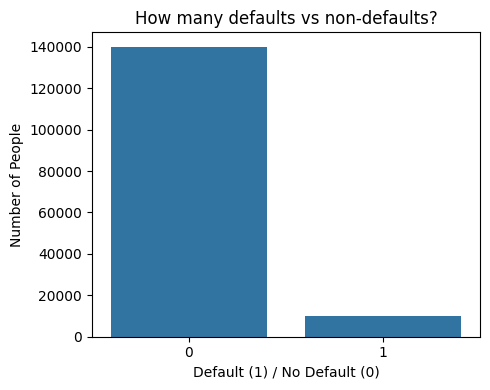

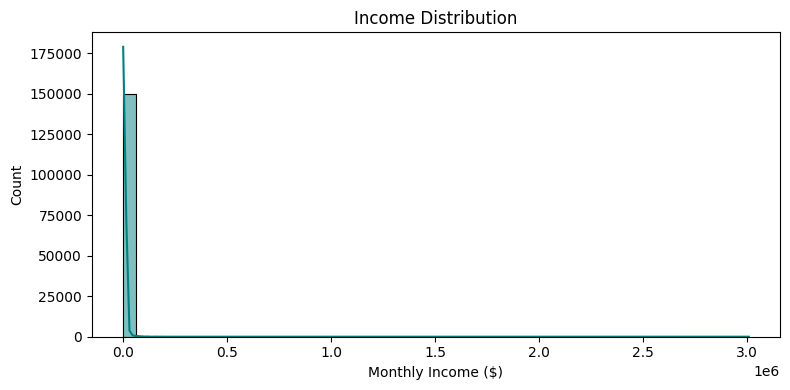

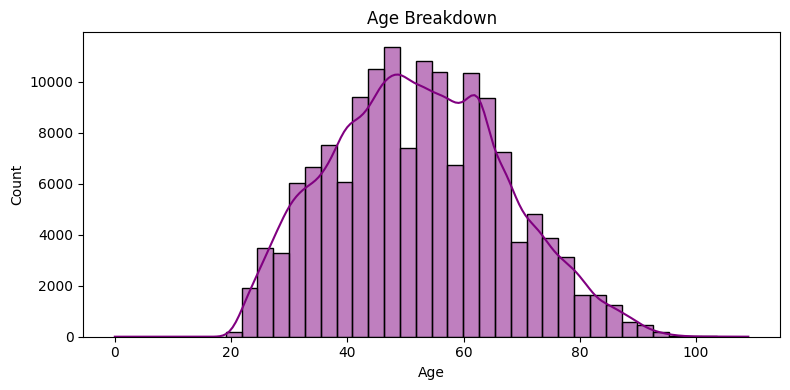

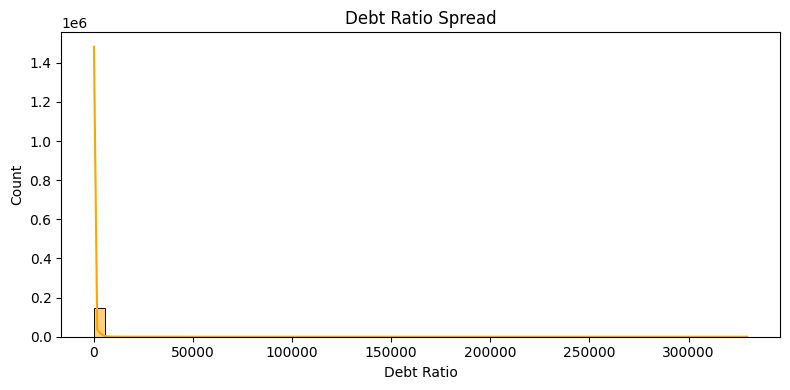

/tmp/ipython-input-113956560.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y='MonthlyIncome', data=data, palette='Set2')


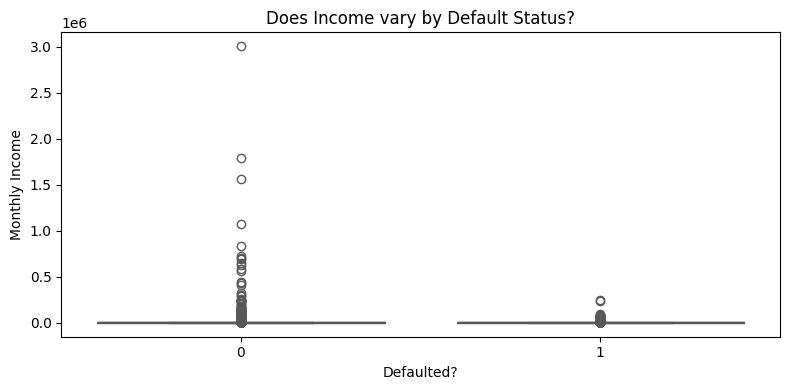

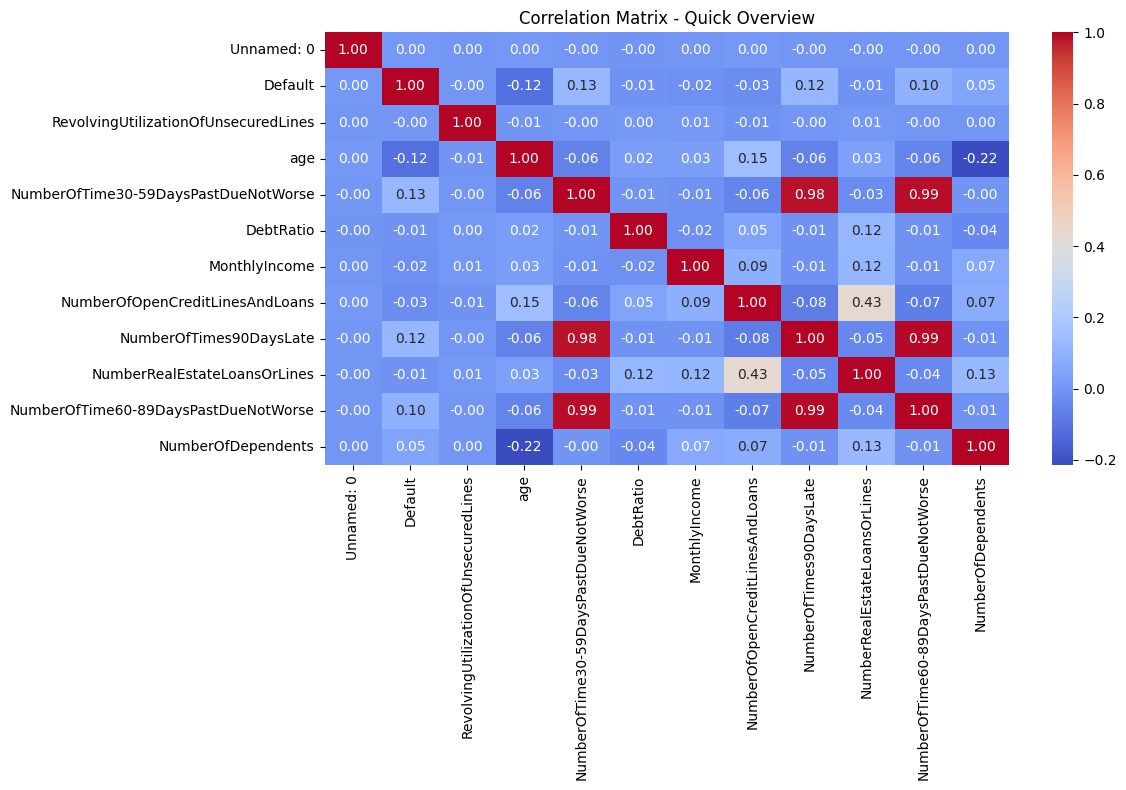

In [1]:
#Importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cs-training.csv')
data.rename(columns={'SeriousDlqin2yrs': 'Default'}, inplace=True)
print(data.head(3))
print("\n--- Dataset Info ---")
print(data.info())

# Quick fix for missing values
# Median seems like a safe placeholder
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(data['NumberOfDependents'].median())


# Basic look at the target variable
plt.figure(figsize=(5,4))
sns.countplot(x='Default', data=data)
plt.title('How many defaults vs non-defaults?')
plt.xlabel('Default (1) / No Default (0)')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

#  Monthly Income

plt.figure(figsize=(8,4))
sns.histplot(data['MonthlyIncome'], bins=50, kde=True, color='teal')
plt.title('Income Distribution')
plt.xlabel('Monthly Income ($)')
plt.tight_layout()
plt.show()

# Age distribution - just to get a sense
plt.figure(figsize=(8,4))
sns.histplot(data['age'], bins=40, kde=True, color='purple')
plt.title('Age Breakdown')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


#  Debt Ratio
plt.figure(figsize=(8,4))
sns.histplot(data['DebtRatio'], bins=60, kde=True, color='orange')
plt.title('Debt Ratio Spread')
plt.xlabel('Debt Ratio')
plt.tight_layout()
plt.show()


# Boxplot: Income vs Defaulted
plt.figure(figsize=(8,4))
sns.boxplot(x='Default', y='MonthlyIncome', data=data, palette='Set2')
plt.title('Does Income vary by Default Status?')
plt.xlabel('Defaulted?')
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()


# Heatmap of Correlations
plt.figure(figsize=(12,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix - Quick Overview')
plt.tight_layout()
plt.show()